<a href="https://colab.research.google.com/github/dhanush852/intro_to-ml/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [62]:
#Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/dhanush852/intro_to-ml/main/Housing.csv'
raw_df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
raw_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [63]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no':0})

raw_df[binary_cols] = raw_df[binary_cols].apply(binary_map)
raw_df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [64]:
np.random.seed(0)
raw_df_train, raw_df_test = train_test_split(raw_df, test_size = 0.2)
raw_df_train.shape,raw_df_test.shape


((436, 13), (109, 13))

In [65]:
def loss(X_values, Y_values, theta, m): #1
    h = X_values.dot(theta)
    err = np.subtract(h,Y_values)
    squareErr = np.square(err)
    loss_value = 1/(2*m) * np.sum(squareErr)
    return loss_value


In [66]:
def penalty_loss(X_values, Y_values, theta, m):#3
    h = X_values.dot(theta)
    err = np.subtract(h,Y_values)
    squareErr = np.square(err)
    penaltly_loss_value = 1/(2*m) * np.sum(squareErr)
    return penaltly_loss_value


In [67]:
def linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, iterations):#1
    training_loss_hist = np.zeros(iterations)
    validation_loss_hist = np.zeros(iterations)
    for i in range(iterations):
        h = X_train.dot(theta)
        err = np.subtract(h,Y_train)
        xy_dtheta = (1/len(Y_train)) * X_train.transpose().dot(err)
        theta = theta - alpha*xy_dtheta
        training_loss_hist[i] = loss(X_train, Y_train, theta, m_train)
        validation_loss_hist[i] = loss(X_test, Y_test, theta, m_test)
    return theta, training_loss_hist, validation_loss_hist


In [68]:
def penalty_linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, penalty, iterations):


    training_loss_hist = np.zeros(iterations)
    validation_loss_hist = np.zeros(iterations)

    for i in range(iterations):
        h = X_train.dot(theta)

        err = np.subtract(h,Y_train)

        xy_dtheta = (1/m_train) * X_train.transpose().dot(err)

        theta = theta*(1-alpha*penalty/m_train) - alpha*xy_dtheta

        training_loss_hist[i] = penalty_loss(X_train, Y_train, theta, m_train)
        validation_loss_hist[i] = penalty_loss(X_test, Y_test, theta, m_test)

    return theta, training_loss_hist, validation_loss_hist


In [69]:
def feature_scaling(raw_df_train, raw_df_test, categorical_cols, scaler):
    df_nrm_train = raw_df_train
    df_nrm_train[['price']] = scaler.fit_transform(raw_df_train[['price']])
    df_nrm_train[categorical_cols] = scaler.fit_transform(raw_df_train[categorical_cols])
    Y_nrm_train = df_nrm_train[['price']].to_numpy()
    m_nrm_train = len(Y_nrm_train)
    X_nrm_train = df_nrm_train[categorical_cols].to_numpy()
    X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))
    df_nrm_test = raw_df_test
    df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
    df_nrm_test[categorical_cols] = scaler.fit_transform(df_nrm_test[categorical_cols])
    Y_nrm_test = df_nrm_test[['price']].to_numpy()
    m_nrm_test = len(Y_nrm_test)
    X_nrm_test = df_nrm_test[categorical_cols].to_numpy()
    X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))
    return X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test

In [70]:

categorical_cols_1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

Y_train = raw_df_train[['price']].to_numpy()

m_train = len(Y_train)

X_train = raw_df_train[categorical_cols_1].to_numpy()
X_train = np.hstack((np.ones((m_train, 1)), X_train))

Y_test = raw_df_test[['price']].to_numpy()

m_test = len(Y_test)

X_test = raw_df_test[categorical_cols_1].to_numpy()
X_test = np.hstack((np.ones((m_test, 1)), X_test))

In [71]:
iterations = 500
alpha = 0.000000001

theta = np.zeros((6,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, iterations)


Text(0.5, 1.0, '1A: Training Loss per Iteration')

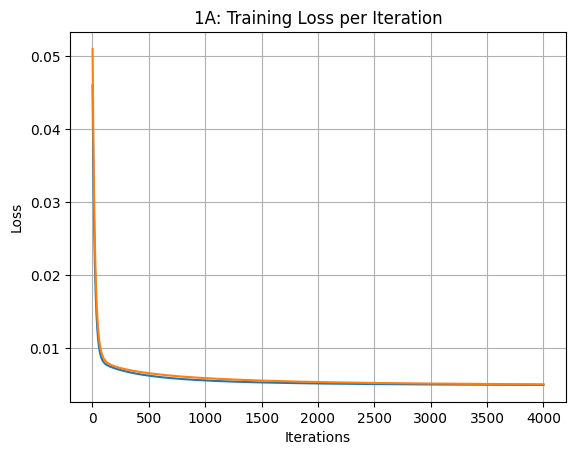

In [109]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('1A: Training Loss per Iteration')


In [73]:
categorical_cols_2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

Y_train = raw_df_train[['price']].to_numpy()

m_train = len(Y_train)

X_train = raw_df_train[categorical_cols_2].to_numpy()
X_train = np.hstack((np.ones((m_train, 1)), X_train))

Y_test = raw_df_test[['price']].to_numpy()

m_test = len(Y_test)

X_test = raw_df_test[categorical_cols_2].to_numpy()
X_test = np.hstack((np.ones((m_test, 1)), X_test))

In [74]:
X_train.shape

(436, 12)

In [78]:
iterations = 500
alpha = 0.000000001

theta = np.zeros((12,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, iterations)

In [ ]:
validation_loss_hist

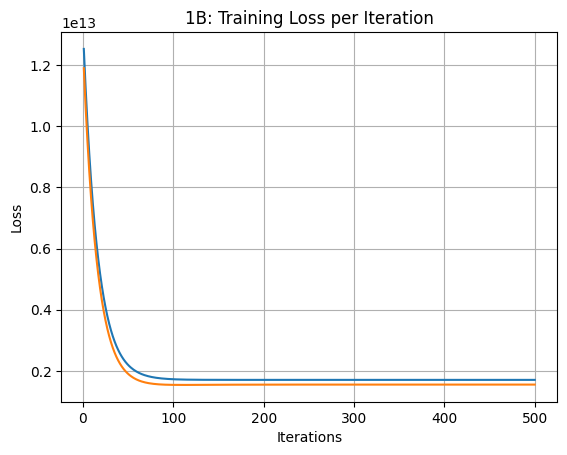

In [82]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('1B: Training Loss per Iteration')
plt.show()

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df_nrm_train = raw_df_train
df_nrm_train[['price']] = scaler.fit_transform(raw_df_train[['price']])
df_nrm_train[categorical_cols_1] = scaler.fit_transform(raw_df_train[categorical_cols_1])
Y_nrm_train = df_nrm_train[['price']].to_numpy()
m_nrm_train = len(Y_nrm_train)
X_nrm_train = df_nrm_train[categorical_cols_1].to_numpy()
X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))


In [88]:
df_nrm_test = raw_df_test

df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
df_nrm_test[categorical_cols_1] = scaler.fit_transform(df_nrm_test[categorical_cols_1])

Y_nrm_test = df_nrm_test[['price']].to_numpy()

m_nrm_test = len(Y_nrm_test)

X_nrm_test = df_nrm_test[categorical_cols_1].to_numpy()
X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))


In [89]:
iterations = 2000
alpha = 0.01

theta = np.zeros((6,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, iterations)


Text(0.5, 1.0, '2A: Training Loss per Iteration - Normalization')

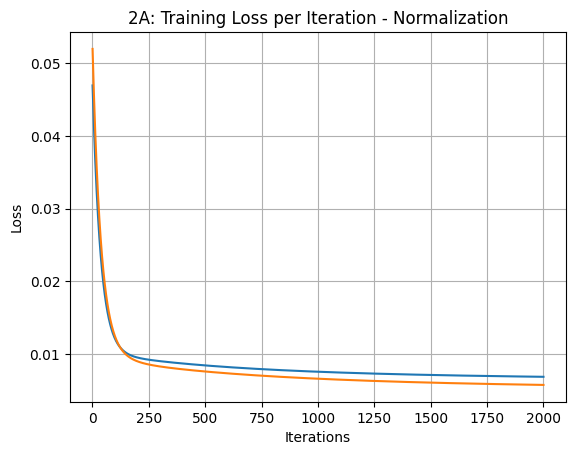

In [90]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2A: Training Loss per Iteration - Normalization')


In [91]:
scaler = StandardScaler()

df_nrm_train = raw_df_train

df_nrm_train[['price']] = scaler.fit_transform(raw_df_train[['price']])
df_nrm_train[categorical_cols_1] = scaler.fit_transform(raw_df_train[categorical_cols_1])

Y_nrm_train = df_nrm_train[['price']].to_numpy()

m_nrm_train = len(Y_nrm_train)

X_nrm_train = df_nrm_train[categorical_cols_1].to_numpy()
X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))


In [92]:
df_nrm_test = raw_df_test

df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
df_nrm_test[categorical_cols_1] = scaler.fit_transform(df_nrm_test[categorical_cols_1])

Y_nrm_test = df_nrm_test[['price']].to_numpy()

m_nrm_test = len(Y_nrm_test)

X_nrm_test = df_nrm_test[categorical_cols_1].to_numpy()
X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))


In [93]:
iterations = 2000
alpha = 0.01

theta = np.zeros((6,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, iterations)


Text(0.5, 1.0, '2A: Training Loss per Iteration - Standardization')

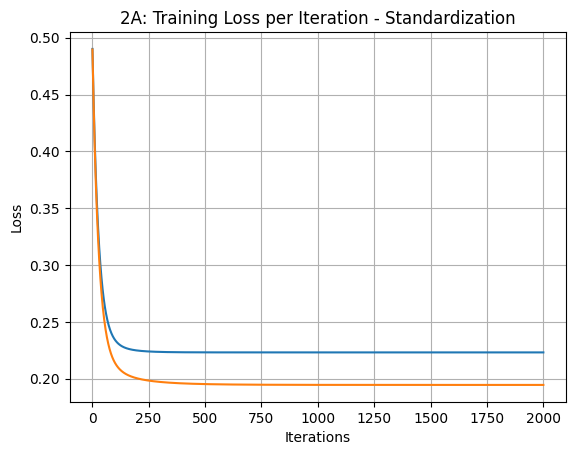

In [94]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2A: Training Loss per Iteration - Standardization')


In [95]:
scaler = MinMaxScaler()

df_nrm_train = raw_df_train

df_nrm_train[['price']] = scaler.fit_transform(raw_df_train[['price']])
df_nrm_train[categorical_cols_2] = scaler.fit_transform(raw_df_train[categorical_cols_2])

Y_nrm_train = df_nrm_train[['price']].to_numpy()

m_nrm_train = len(Y_nrm_train)

X_nrm_train = df_nrm_train[categorical_cols_2].to_numpy()
X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))


In [96]:
df_nrm_test = raw_df_test

df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
df_nrm_test[categorical_cols_2] = scaler.fit_transform(df_nrm_test[categorical_cols_2])

Y_nrm_test = df_nrm_test[['price']].to_numpy()

m_nrm_test = len(Y_nrm_test)

X_nrm_test = df_nrm_test[categorical_cols_2].to_numpy()
X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))


In [97]:
iterations = 4000
alpha = 0.01

theta = np.zeros((12,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, iterations)


Text(0.5, 1.0, '2b: Training Loss per Iteration - Normalization')

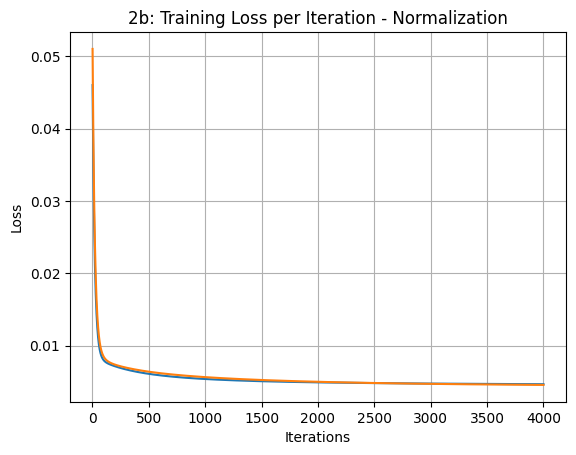

In [98]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2b: Training Loss per Iteration - Normalization')


In [99]:
scaler = StandardScaler()

df_nrm_train = raw_df_train

df_nrm_train[['price']] = scaler.fit_transform(raw_df_train[['price']])
df_nrm_train[categorical_cols_2] = scaler.fit_transform(raw_df_train[categorical_cols_2])

Y_nrm_train = df_nrm_train[['price']].to_numpy()

m_nrm_train = len(Y_nrm_train)

X_nrm_train = df_nrm_train[categorical_cols_2].to_numpy()
X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))


In [100]:
df_nrm_test = raw_df_test

df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
df_nrm_test[categorical_cols_2] = scaler.fit_transform(df_nrm_test[categorical_cols_2])

Y_nrm_test = df_nrm_test[['price']].to_numpy()

m_nrm_test = len(Y_nrm_test)

X_nrm_test = df_nrm_test[categorical_cols_2].to_numpy()
X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))


In [101]:
iterations = 2000
alpha = 0.01

theta = np.zeros((12,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, iterations)


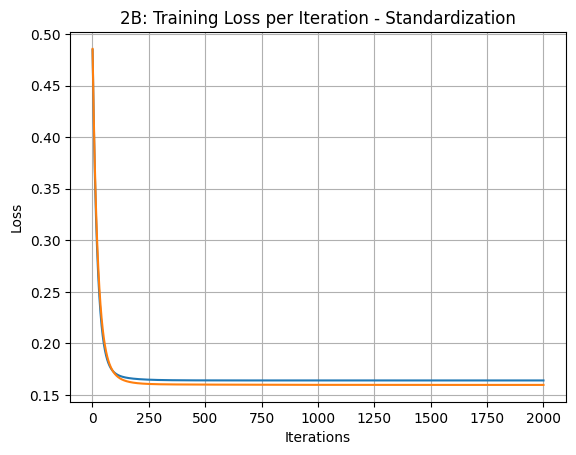

In [102]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2B: Training Loss per Iteration - Standardization')
X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test = feature_scaling(raw_df_train, raw_df_test, categorical_cols_1, MinMaxScaler())


In [105]:
iterations = 4000
penalty = 1
alpha = 0.01

theta = np.zeros((6,1))
theta, training_loss_hist, validation_loss_hist = penalty_linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, penalty, iterations)

ValueError: ignored

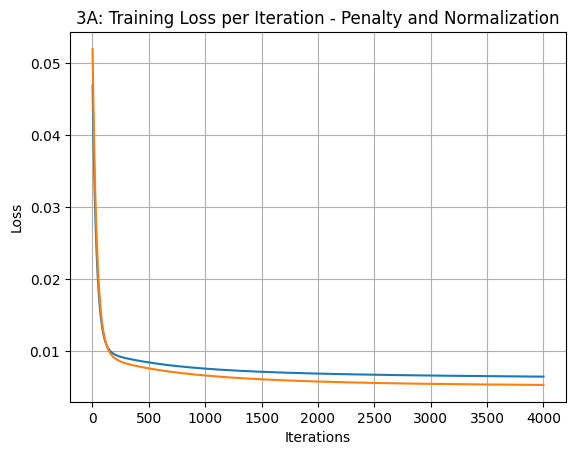

In [106]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('3A: Training Loss per Iteration - Penalty and Normalization')
X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test = feature_scaling(raw_df_train, raw_df_test, categorical_cols_2, MinMaxScaler())


In [107]:
iterations = 4000
penalty = 10
alpha = 0.01

theta = np.zeros((12,1))

theta, training_loss_hist, validation_loss_hist = penalty_linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, penalty, iterations)


Text(0.5, 1.0, '3B: Training Loss per Iteration - Penalty and Normalization')

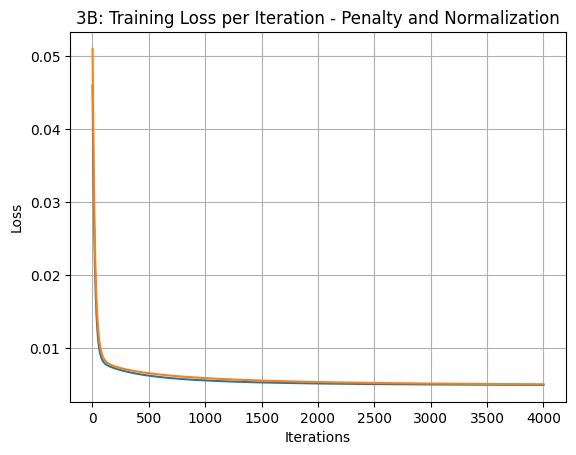

In [108]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('3B: Training Loss per Iteration - Penalty and Normalization')